In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("train_preprocessed.csv")

In [3]:
# Only works for numeric features
correlations = df.corr(numeric_only=True)['LoanAmount'].sort_values(ascending=False)
print(correlations)


LoanAmount                 1.000000
ApplicantIncome            0.594518
CoapplicantIncome          0.249131
Dependents                 0.163205
Married                    0.153527
Gender_Male                0.113118
Self_Employed              0.112711
property_Area_Urban        0.051066
Loan_Amount_Term           0.037545
Credit_History             0.000427
property_Area_Rural       -0.004833
Loan_Status               -0.041341
property_Area_Semiurban   -0.044403
Gender_Female             -0.113118
Education                 -0.174001
Name: LoanAmount, dtype: float64


In [4]:
train, test = train_test_split(df,train_size=0.75, random_state=42)

In [5]:
y_train = train['Loan_Status']
X_train = train.drop(columns='Loan_Status')
X_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
92,1.0,2.0,1.0,0.0,3273.0,1820.0,81.0,360.0,1.0,0,1,0,0,1
304,0.0,0.0,0.0,0.0,4000.0,2500.0,140.0,360.0,1.0,0,0,1,0,1
68,1.0,3.0,1.0,1.0,7100.0,0.0,125.0,84.0,1.0,0,1,0,0,1
15,0.0,0.0,0.0,0.0,3806.0,0.0,125.0,360.0,1.0,0,1,0,0,1
211,1.0,3.0,0.0,0.0,3430.0,1250.0,128.0,360.0,0.0,1,0,0,0,1


In [6]:
y_test = test['Loan_Status']
X_test = test.drop(columns='Loan_Status')

In [7]:
def showStatistcs(Y_pred,Y,methodname):
    print(f'the performance metrics for test data using {methodname}:\n')
    print(f'Confusion matrix:\n{confusion_matrix(Y_pred,Y)}\n')
    print(f'Accuracy Score :{accuracy_score(Y_pred,Y)*100 :.4f}\n')
    print(f'Precision Score :{precision_score(Y_pred,Y)*100 :.4f}\n')
    print(f'Recall Score :{recall_score(Y_pred,Y)*100 :.4f}\n')
    print(f'f1 Score :{f1_score(Y_pred,Y)*100 :.4f}\n')

RMSE: 47.120
MAE: 32.777
Accuracy: 0.400
0.6126981316768062


<Axes: >

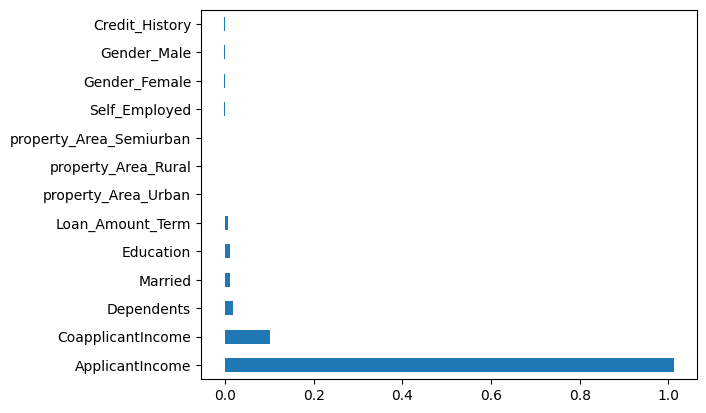

In [8]:
y_train = train[train['Loan_Status']==1]['LoanAmount']
X_train = train[train['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

y_test = test[test['Loan_Status']==1]['LoanAmount']
X_test = test[test['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

model = LinearRegression()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_test_predict, y_test))
print(f'RMSE: {rmse_train:.3f}')
mae_train = mean_absolute_error(y_test_predict, y_test)
print(f'MAE: {mae_train:.3f}')

epsilon = 1e-3
comparision = (y_test_predict <= y_test + epsilon)
accuracy_type = comparision.sum()/len(y_test_predict)
print(f'Accuracy: {accuracy_type:.3f}')
print(r2_score(y_test, y_test_predict))

from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.Series(result.importances_mean, index=X_test.columns)
importance.sort_values(ascending=False).plot(kind='barh')


In [9]:
y_train = train[train['Loan_Status']==1]['LoanAmount']
X_train = train[train['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

y_test = test[test['Loan_Status']==1]['LoanAmount']
X_test = test[test['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_test_predict = model_rf.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_test_predict, y_test))
print(f'RMSE: {rmse_train:.3f}')
mae_train = mean_absolute_error(y_test_predict, y_test)
print(f'MAE: {mae_train:.3f}')

epsilon = 1e-3
comparision = (y_test_predict <= y_test + epsilon)
accuracy_type = comparision.sum()/len(y_test_predict)
print(f'Accuracy: {accuracy_type:.3f}')
print(r2_score(y_test, y_test_predict))

RMSE: 51.594
MAE: 32.058
Accuracy: 0.500
0.5356540925378888


In [10]:
y_train = train[train['Loan_Status']==1]['LoanAmount']
X_train = train[train['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

y_test = test[test['Loan_Status']==1]['LoanAmount']
X_test = test[test['Loan_Status']==1].drop(columns=['LoanAmount','Loan_Status'])

transfomer = PolynomialFeatures(degree=4)
X_train_transf = transfomer.fit_transform(X_train)
X_test_transf = transfomer.fit_transform(X_test)

model_p = LinearRegression()
model_p.fit(X_train_transf, y_train)

y_test_predict = model_p.predict(X_test_transf)

rmse_train = sqrt(mean_squared_error(y_test_predict, y_test))
print(f'RMSE: {rmse_train:.3f}')
mae_train = mean_absolute_error(y_test_predict, y_test)
print(f'MAE: {mae_train:.3f}')

epsilon = 1e-3
comparision = (y_test_predict <= y_test + epsilon)
accuracy_type = comparision.sum()/len(y_test_predict)
print(f'Accuracy: {accuracy_type:.3f}')
print(r2_score(y_test, y_test_predict))

print("First 5 actual:", y_test.values[:10])
print("First 5 preds:", y_test_predict[:10])

RMSE: 51691.170
MAE: 5333.581
Accuracy: 0.580
-466093.4886072258
First 5 actual: [228. 130. 158.  71.  70. 107. 120.  66. 153.  94.]
First 5 preds: [212.75335808  94.72404917 120.2716935   97.85024405  87.49856601
 130.31479143 100.11729364  82.67605518 125.82139333 -40.89763981]


In [11]:
df = pd.read_csv('submissions.csv')

In [12]:
X_test = df[df['Loan_Status']==0].drop(columns=['LoanAmount','Loan_Status'])

y_testing = df[df['Loan_Status']==0]['LoanAmount']
print(f'Loan amount rejected : {y_testing}')

# X_test_transf = transfomer.transform(X_test)
# y_test_predict = model.predict(X_test_transf)

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# y_test_predict = model.predict(X_test)

y_test_predict = model_rf.predict(X_test)

print(f'Loan amount should get accepted(after regression) : {y_test_predict}')
print(y_test_predict)


mask = df['Loan_Status']==0
df.loc[mask, 'Loan_Amount'] = y_test_predict

df.to_csv('submissions2.csv', index=False)

Loan amount rejected : 7      147.0
13     166.0
25     148.0
35     176.0
55     130.0
       ...  
325     95.0
339    162.0
346    133.0
351    106.0
354    158.0
Name: LoanAmount, Length: 67, dtype: float64
Loan amount should get accepted(after regression) : [110.63   376.9197 145.25    95.733   70.213  133.45    96.79   111.27
  93.418  182.12   120.7045 126.26   400.0833 119.53   118.0365 149.75
  76.8865  65.2285 124.6565 116.96   125.18   167.75   273.084  157.79
  82.097  109.81   164.6952 212.5887 187.94   120.81    91.53    68.04
  83.9615 133.41   104.7    115.03   116.6305 133.02   110.6    113.02
  96.58   169.6965 156.85   144.49   122.07   157.76   255.14   131.67
 120.3    110.95   113.31   111.11   133.01   143.4495 126.172  107.903
 111.45   110.27   155.21   167.33    78.1215 127.6465  97.7195 149.85
 123.44   139.83   152.66  ]
[110.63   376.9197 145.25    95.733   70.213  133.45    96.79   111.27
  93.418  182.12   120.7045 126.26   400.0833 119.53   118.0365 149.